## Loan Approval Prediction 

In [8]:
# Load necessary python libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('data/loan_prediction.csv')
print(df.head())

    Loan_ID Gender Married Dependents  ... Loan_Amount_Term Credit_History  Property_Area  Loan_Status
0  LP001002   Male      No          0  ...            360.0            1.0          Urban            Y
1  LP001003   Male     Yes          1  ...            360.0            1.0          Rural            N
2  LP001005   Male     Yes          0  ...            360.0            1.0          Urban            Y
3  LP001006   Male     Yes          0  ...            360.0            1.0          Urban            Y
4  LP001008   Male      No          0  ...            360.0            1.0          Urban            Y

[5 rows x 13 columns]


In [9]:
# drop loan id column and move forward
df = df.drop('Loan_ID', axis=1)

In [10]:
# let look if data has missing values or not
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
count       614.000000         614.000000  592.000000         600.00000      564.000000
mean       5403.459283        1621.245798  146.412162         342.00000        0.842199
std        6109.041673        2926.248369   85.587325          65.12041        0.364878
min         150.000000           0.000000    9.000000          12.00000        0.000000
25%        2877.500000           0.000000  100.000000         360.00000        1.000000
50%        3812.500000        1188.500000  128.000000         360.00000        1.000000
75%        5795.000000        2297.250000  168.000000         360.00000        1.000000
max       81000.000000       41667.000000  700.000000         480.00000        1.000000


In [13]:
# Fill missing values in categorical columns with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [14]:
# Fill missing values in LoanAmount with the median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

# Fill missing values in Loan_Amount_Term with the mode
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# Fill missing values in Credit_History with the mode
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])


### Exploratory Data Analysis

In [18]:
import plotly.express as px
loan_status_count = df['Loan_Status'].value_counts()
fig_loan_status = px.pie(loan_status_count, 
                         names=loan_status_count.index,
                         title='Loan Approval Status')
fig_loan_status.show()

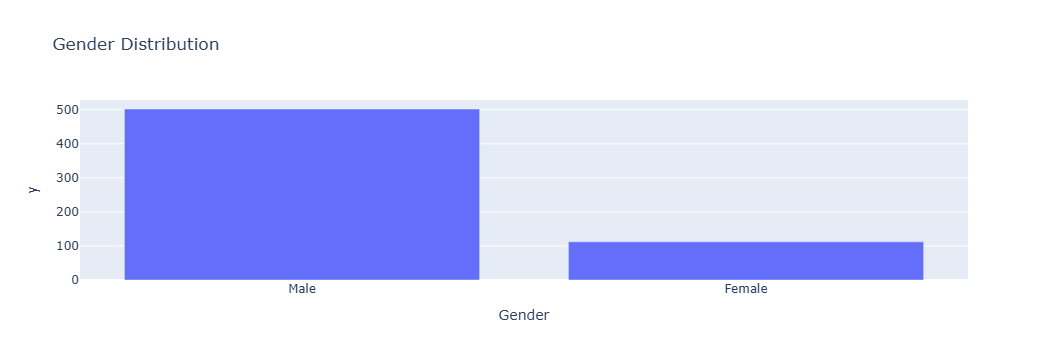

In [19]:
# distribution of gender column
gender_count = df['Gender'].value_counts()
fig_gender = px.bar(gender_count, 
                    x=gender_count.index,
                    y=gender_count.values,
                    title="Gender Distribution")
fig_gender.show()

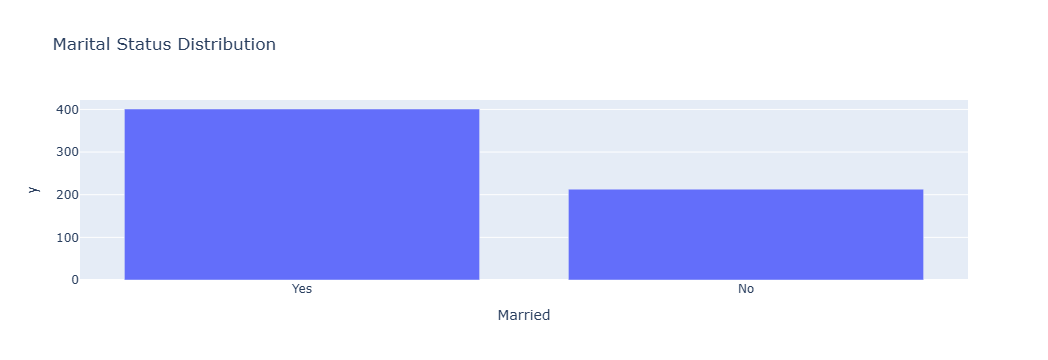

In [20]:
# distribution of martial status column
married_count = df['Married'].value_counts()
fig_married = px.bar(married_count,
                     x = married_count.index,
                     y = married_count.values,
                     title = 'Marital Status Distribution')
fig_married.show()

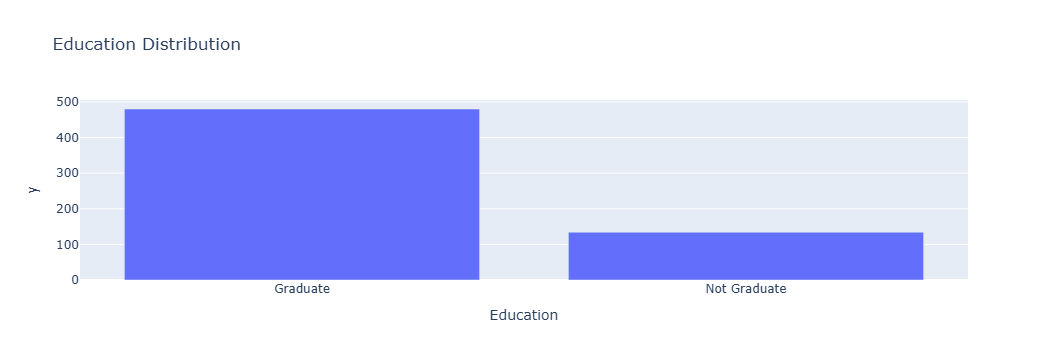

In [22]:
# distribution of the education column
education_count = df['Education'].value_counts()
fig_education = px.bar(education_count,
                       x = education_count.index,
                       y = education_count.values,
                       title = 'Education Distribution')
fig_education.show()

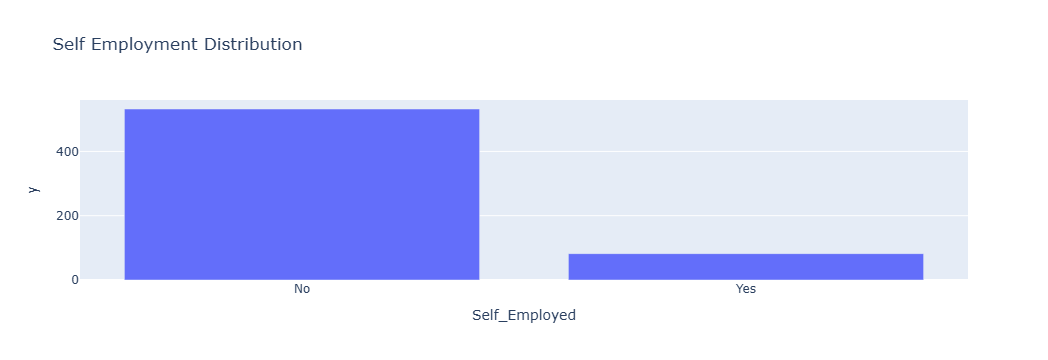

In [23]:
self_employed_count = df['Self_Employed'].value_counts()
fig_self_employed = px.bar(self_employed_count,
                           x = self_employed_count.index,
                           y = self_employed_count.values,
                           title = 'Self Employment Distribution')
fig_self_employed.show()

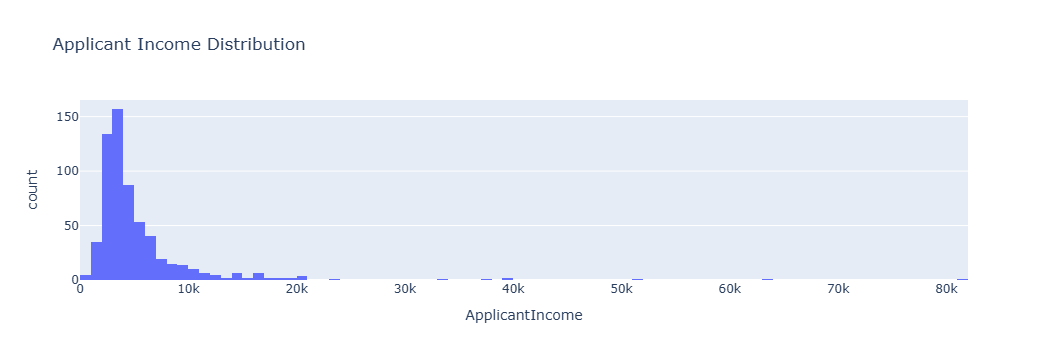

In [24]:
# distribution of applicant income column
fig_application_income = px.histogram(df, x='ApplicantIncome', 
                                      title='Applicant Income Distribution')
fig_application_income.show()

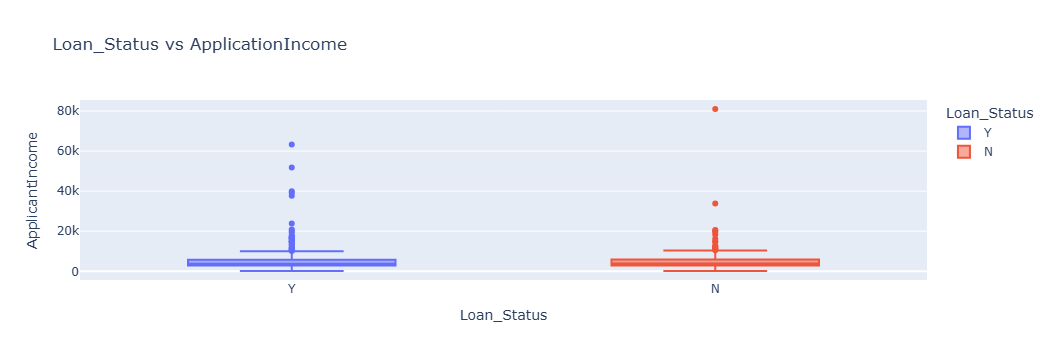

In [25]:
# relationship between the income of loan applicant and the loan
fig_income = px.box(df, x='Loan_Status',
                    y='ApplicantIncome',
                    color='Loan_Status',
                    title='Loan_Status vs ApplicationIncome')
fig_income.show()

In [26]:
## the 'ApplicantIncome' column contains outliers which need to be removed before moving further. to remove the outlier
# Calculate the IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# remove outlier
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

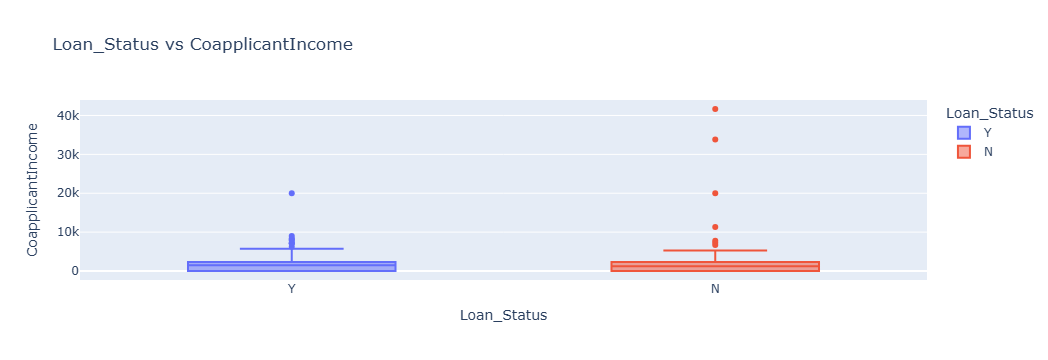

In [27]:
# relationship between the income of loan co-applicant and the loan status
fig_coapplicant_income = px.box(df,
                                x = 'Loan_Status',
                                y = 'CoapplicantIncome',
                                color = 'Loan_Status',
                                title = 'Loan_Status vs CoapplicantIncome')
fig_coapplicant_income.show()

In [29]:
# income of loan co-applicant also contains outilers. let's remove the outliers from this column
# calculate the IQR
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# remove outliers
df = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'] <= upper_bound)]

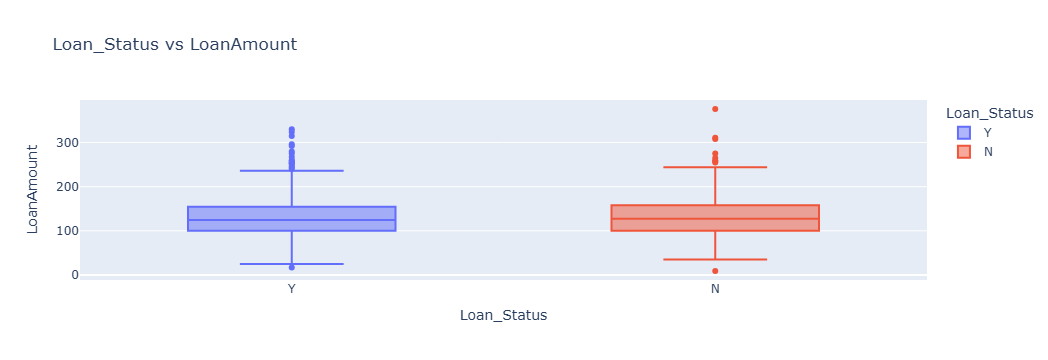

In [30]:
# relationship between the loan amount & loan status
fig_loan_amount = px.box(df, x='Loan_Status', 
                         y='LoanAmount',
                         color='Loan_Status',
                         title='Loan_Status vs LoanAmount')
fig_loan_amount.show()

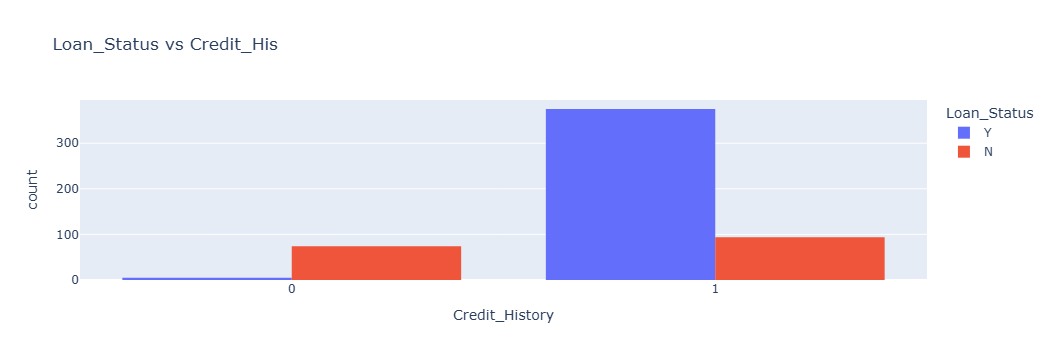

In [31]:
# relationship between credit history and loan status
fig_credit_history = px.histogram(df, x='Credit_History', color='Loan_Status',
                                  barmode='group',
                                  title='Loan_Status vs Credit_His')
fig_credit_history.show()

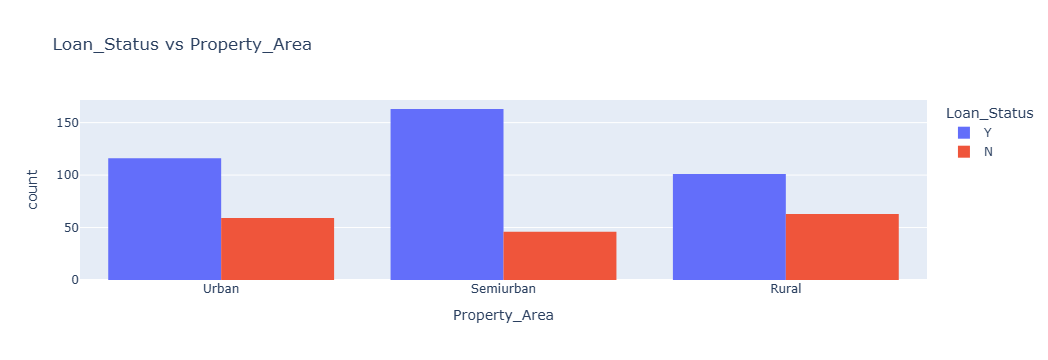

In [32]:
# relationship between property area and loan status
fig_property_area = px.histogram(df, x='Property_Area', color='Loan_Status',
                                 barmode='group',
                                 title='Loan_Status vs Property_Area')
fig_property_area.show()

In [33]:
## Data Preparation and Training Loan Approval Prediction Model
# convert categorical columns to numerical using one-hot encoding
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns = cat_cols)

# split the dataset into features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [34]:
# make predictions on test
y_pred = model.predict(X_test)
print(y_pred)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y']


In [35]:
# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns = X_test.columns)

# add predicted values of X_test_df
X_test_df['Loan_Status_Predicted'] = y_pred
print(X_test_df.head())

     ApplicantIncome  CoapplicantIncome  LoanAmount  ...  Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Predicted
277        -0.544528          -0.037922   -0.983772  ...                    False                 True                      Y
84         -0.067325          -0.931554   -1.571353  ...                    False                 True                      Y
275        -0.734870           0.334654   -0.298262  ...                     True                False                      Y
392        -0.824919           0.522317   -0.200332  ...                    False                 True                      Y
537        -0.267373          -0.931554   -0.454950  ...                     True                False                      Y

[5 rows x 21 columns]


In [36]:
print(X_test_df)

     ApplicantIncome  CoapplicantIncome  LoanAmount  ...  Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Predicted
277        -0.544528          -0.037922   -0.983772  ...                    False                 True                      Y
84         -0.067325          -0.931554   -1.571353  ...                    False                 True                      Y
275        -0.734870           0.334654   -0.298262  ...                     True                False                      Y
392        -0.824919           0.522317   -0.200332  ...                    False                 True                      Y
537        -0.267373          -0.931554   -0.454950  ...                     True                False                      Y
..               ...                ...         ...  ...                      ...                  ...                    ...
17         -0.325069          -0.931554   -1.062116  ...                    False                 True                